# Amazon Hisse Senedi Fiyatı Tahmini

<ol>
    <li>İş Problemini Anlamak (Business Problem Understanding)</li>
    <li>Veriyi Anlamak (Data Understanding)</li>
    <li>Veri Ön İşleme (Data Preprocessing)</li>
    <ul><li>İstatistiksel Metodlar ve Düzeltme Yöntemleri için Veri Ön İşleme</li><li>Derin Öğrenme Yöntemleri için Veri Ön İşleme</li></ul>
    <li>Keşifsel Veri Analizi (Exploratory Data Analysis)</li>
    <li>Modelleme (Modeling)</li>
    <li>Değerlendirme (Evaluation)</li>
</ol>
</ol>
</ol>

## 1) İş Problemini Anlamak (Business Problem Understanding)
<p>Bu veri setinde amacımız Amazon şirketinin geçmiş dönemlere ait hisse senedi kapanış fiyatı bilgilerini kullanarak gelecek dönemlere ait hisse senedi fiyatlarını tahmin etmektir.</p>

## 2) Veriyi Anlamak (Data Understanding)

<p>
<ul>
    <li><b>Date:</b> İlgili işlem gününün tarihini temsil etmektedir.</li>
    <li><b>Open:</b> İlgili işlem gününe ait hisse başlangıç fiyatını temsil etmektedir.</li>
    <li><b>High:</b> İlgili işlem gününe ait en yüksek fiyatı temsil etmektedir.</li>
    <li><b>Low:</b> İlgili işlem gününe ait en düşük fiyatı temsil etmektedir.</li>
    <li><b>Close:</b> İlgili işlem gününe ait hisse kapanış fiyatını temsil etmektedir.</li>
    <li><b>Adj Close:</b> İlgili işlem gününe ait hisse senedinin düzeltilmiş kapanış fiyatını temsil etmektedir.</li>
    <li><b>Volume:</b> İlgili işlem gününe ait işlem hacmi bilgisini temsil etmektedir.</li>
<ul>
</p>


### 2.1) Gerekli Kütüphanelerin ve Veri Setinin Yüklenmesi

<p>Bu jupyter notebook'un çalışabilmesi için NumPy, Pandas, Matplotlib, Seaborn, Statsmodels, Tensorflow ve Scikit-learn kütüphanelerinin yüklü olması gerekmektedir. Eğer bu kütüphaneler yüklü değil ise aşağıdaki kodu çalıştırın.</p>

In [1]:
# pip install numpy pandas matplotlib seaborn statsmodels tensorflow scikit-learn

In [2]:
# Veriyi okuma ve işleme adımında kullanılacak olan kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# İstatistiksel metodlar ve Düzeltme yöntemleri için kullanılacak kütüphaneler
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Derin Öğrenme modelleri için kullanılacak olan kütüphaneler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Model değerlendirmek için kullanılacak kütüphaneler
from sklearn.metrics import mean_absolute_error

# Warningleri kapatmak için gerekli olan kütüphaneler
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_ = pd.read_csv("Amazon.csv")

### 2.2) Veri Setine Genel Bakış

In [4]:
df = df_.copy()

In [5]:
print(f"Veri seti {df.shape[0]} gözlemden ve {df.shape[1]} değişkenden oluşmaktadır.")

Veri seti 5842 gözlemden ve 7 değişkenden oluşmaktadır.


In [6]:
# İlk 5 Gözlem
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [7]:
# Son 5 Gözlem
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5837,2020-07-27,3062.00000,3098.000000,3015.77002,3055.209961,3055.209961,4170500
5838,2020-07-28,3054.27002,3077.090088,2995.76001,3000.330078,3000.330078,3126700
5839,2020-07-29,3030.98999,3039.159912,2996.77002,3033.530029,3033.530029,2974100
5840,2020-07-30,3014.00000,3092.000000,3005.00000,3051.879883,3051.879883,6128300
5841,2020-07-31,3244.00000,3246.820068,3151.00000,3164.679932,3164.679932,8085500


In [8]:
# Değişkenlerin veri tipleri
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
# Veri setinde eksik değer olup olmadığına bakma
df.isnull().values.any()

False

In [10]:
# Numerik değişkenlerin betimsel istatistiklerine bakma
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,5842.0,3.727072e+02,5.855718e+02,1.406250,3.795500e+01,8.342875e+01,3.597300e+02,3.251060e+03
High,5842.0,3.769214e+02,5.917665e+02,1.447917,3.854750e+01,8.494500e+01,3.634400e+02,3.344290e+03
Low,5842.0,3.681146e+02,5.786607e+02,1.312500,3.720750e+01,8.165625e+01,3.562800e+02,3.151000e+03
Close,5842.0,3.727467e+02,5.856077e+02,1.395833,3.792750e+01,8.346000e+01,3.600475e+02,3.200000e+03
Adj Close,5842.0,3.727467e+02,5.856077e+02,1.395833,3.792750e+01,8.346000e+01,3.600475e+02,3.200000e+03
Volume,5842.0,7.519048e+06,7.282683e+06,487200.000000,3.684900e+06,5.657200e+06,8.533400e+06,1.043292e+08


## 3) Veri Ön İşleme (Data Preprocessing)

### 3.1) İstatistiksel Metodlar ve Düzeltme Yöntemler için Veri Ön İşleme

In [11]:
# Date değişkenin veri tipini tarih olarak değiştirme
df["Date"] = pd.to_datetime(df["Date"])

In [12]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [13]:
# Tarih bilgisini ve kapanış bilgisini yeni bir dataframe'a atama
df_stat = df[["Date","Close"]]

df_stat.head(2)

,Date,Close
0,1997-05-15,1.958333
1,1997-05-16,1.729167


In [14]:
# İndex bilgisini 'Date' kolonuna göre değiştirme ve "Date" kolonunu silme
df_stat.set_index("Date", drop=True, inplace=True)

df_stat.head(2)

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167


In [15]:
# İndex frekans bilgisini Günlük yapma
df_stat = df_stat.asfreq('D')

In [16]:
# İndex frekansına bakma
df_stat.index.freq

<Day>

In [17]:
# İndex frekansı ayarlaması sonrası eksik değer kontrolu
df_stat.isnull().sum()

Close    2637
dtype: int64

In [18]:
# Eksik değerleri doldurma
df_stat = df_stat.fillna(method="bfill")

In [19]:
# Modelin eğitimi ve test edilmesi için veri setinin ikiye ayrılması

# Train setinin boyutunu belirleme %80 train %10 test olmasını istiyoruz.
train_size = int(len(df_stat) * 0.8)

train_stat = df_stat.iloc[:train_size]
test_stat = df_stat.iloc[train_size:]

In [20]:
print(f"Train setinin boyutu: {len(train_stat)}")
print(f"Test setinin boyutu: {len(test_stat)}")

Train setinin boyutu: 6783
Test setinin boyutu: 1696


In [21]:
# Train seti için kapanış değerlerine logaritmik dönüşüm uygulama
train_stat["Close"] = np.log1p(train_stat["Close"])

# Test seti için kapanış değerlerine logaritmik dönüşüm uygulama
test_stat["Close"] = np.log1p(test_stat["Close"])

### 3.2) Derin Öğrenme Yöntemleri için Veri Ön İşleme

In [22]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [23]:
df_dl = df[["Date", "Close"]]

In [24]:
# İndex bilgisini 'Date' kolonuna göre değiştirme ve "Date" kolonunu silme
df_dl.set_index("Date", drop=True, inplace=True)

df_dl.head(3)

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333


In [25]:
# İndex frekans bilgisini Günlük yapma
df_dl = df_dl.asfreq('D')

In [26]:
# İndex bilgisini kontrol etme
df_dl.index.freq

<Day>

In [27]:
# İndex frekansı ayarlaması sonrası eksik değer kontrolu
df_dl.isnull().sum()

Close    2637
dtype: int64

In [28]:
# Eksik değerleri doldurma
df_dl = df_dl.fillna(method="bfill")

In [29]:
# Hisse kapanış değerlerini numpy arrayine çevirme işlemi
df_dl = df_dl.values

In [30]:
# Numpy arrayinin veri tipini float32 olarak değiştirme
df_dl = df_dl.astype("float32")

In [31]:
# Veri setinin train ve test olarak ikiye ayrılmasında kullanılacak olan fonksiyon

def split_data(dataframe, test_size):
    position = int(round(len(dataframe) * (1-test_size)))
    train = dataframe[:position]
    test = dataframe[position:]
    return train, test, position

In [32]:
train_dl, test_dl, position = split_data(df_dl, 0.20)

In [33]:
print(f"Train setinin boyutu: {train_dl.shape}")
print(f"Test setinin boyutu: {test_dl.shape}")

Train setinin boyutu: (6783, 1)
Test setinin boyutu: (1696, 1)


In [34]:
# Train seti için kapanış değerlerine logaritmik dönüşüm uygulama
train_dl = np.log1p(train_dl)

# Test seti için kapanış değerlerine logaritmik dönüşüm uygulama
test_dl = np.log1p(test_dl)

In [35]:
# Derin öğrenme modellerinde veriden feature çıkartmak için kullanılacak olan fonksiyon

def create_features(data, lookback):
    X, Y = [], []
    # Her bir i değerini Y listesine, 
    # Her bir y değerinden önceki lookback sayısı kadar değeri de X listesine ekledik.
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

In [36]:
lookback = 7

In [37]:
# İlgili tarihden 7 gün öncesine ilişkin featurelar türetme işlemi

# Train veri seti için
X_train, y_train = create_features(train_dl, lookback)

# Test veri seti için
X_test, y_test = create_features(test_dl, lookback)

In [38]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6776, 7), (6776,), (1689, 7), (1689,))

In [39]:
# Bağımlı ve bağımsız değişkenlerini yeniden şekillendirme

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

## 4) Keşifsel Veri Analizi (Exploratory Data Analysis)

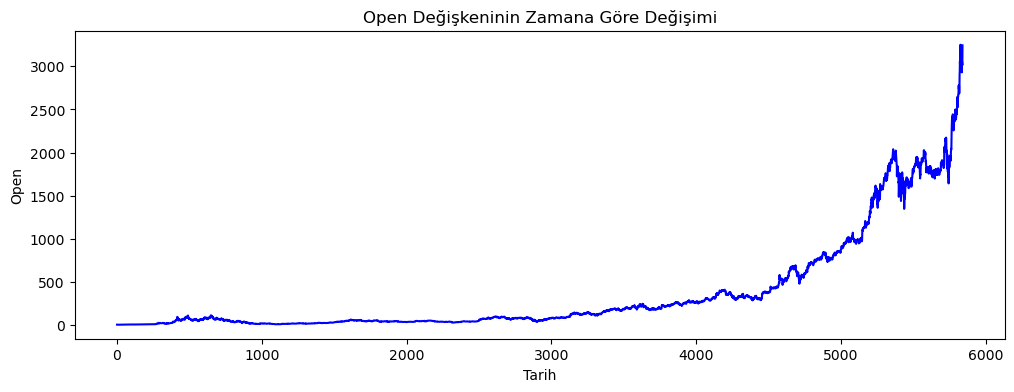

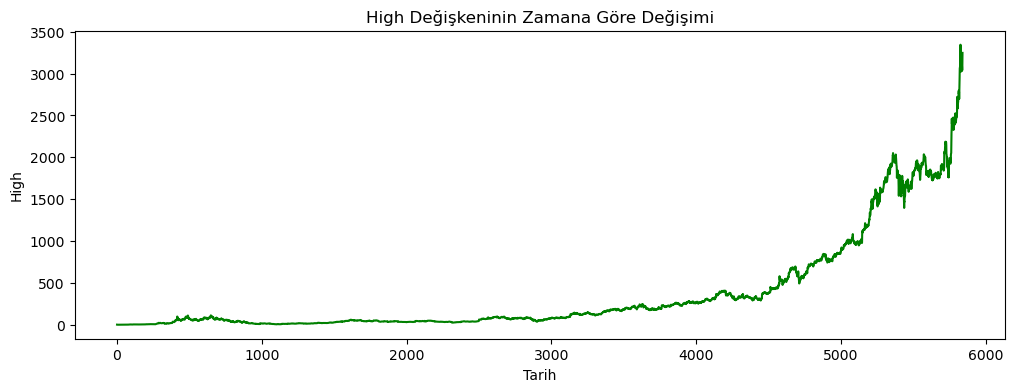

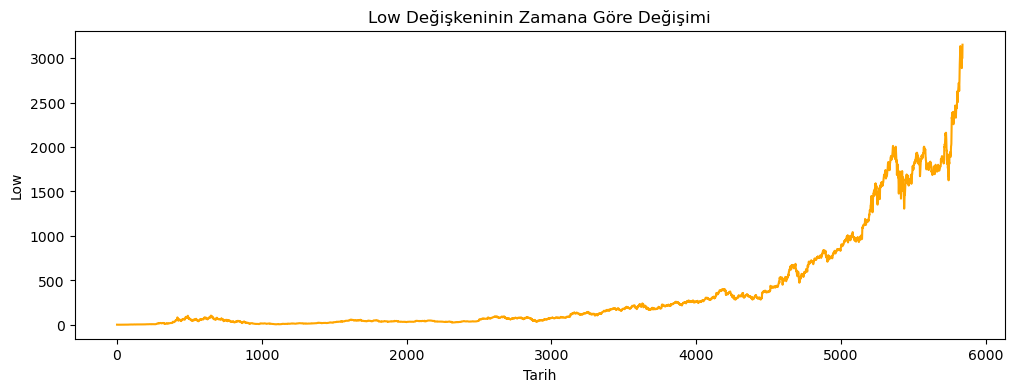

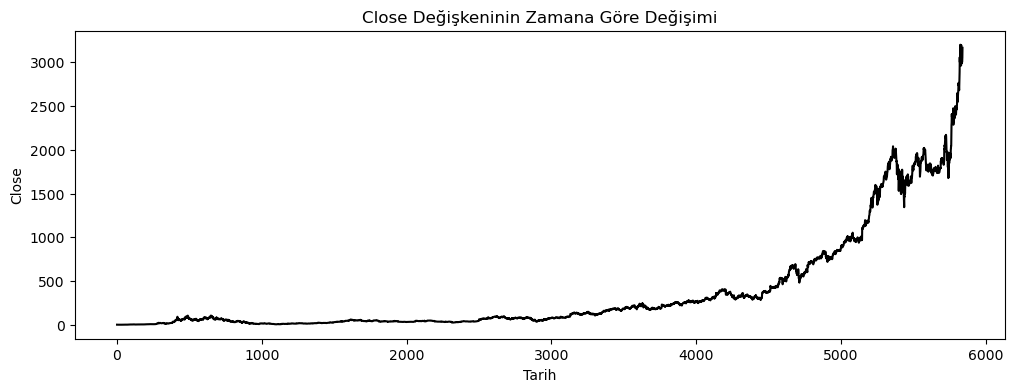

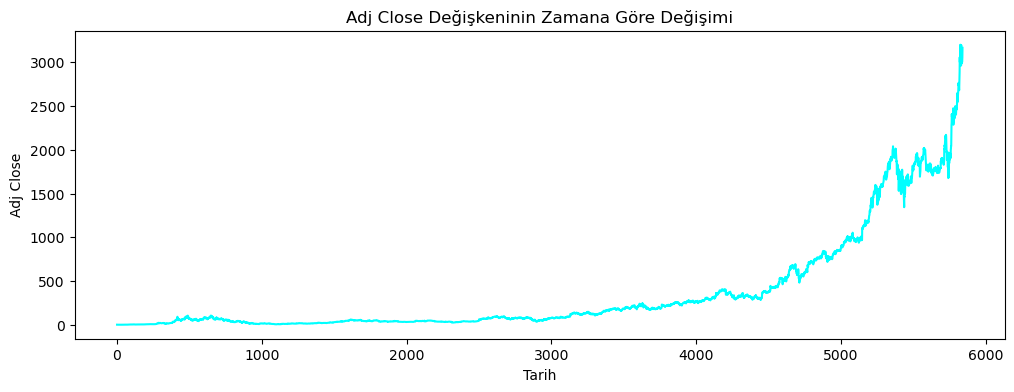

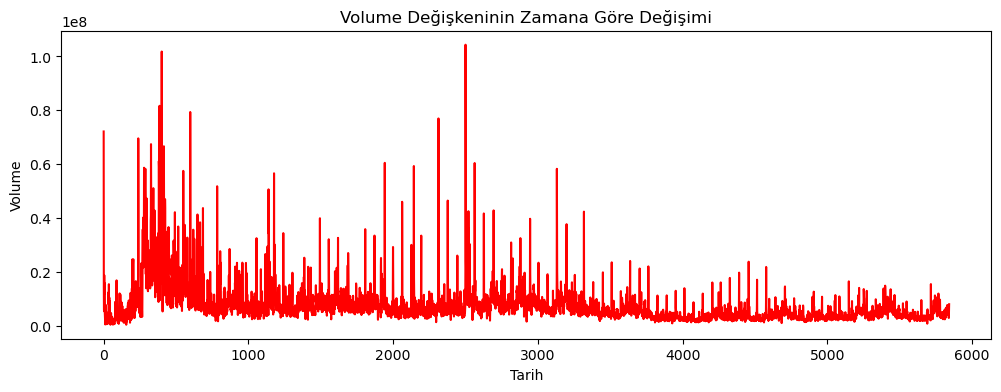

In [40]:
# Değişkenlerin zaman içersindeki değişimi
columns = [col for col in df.columns if col != "Date"]
colors = ["blue", "green", "orange", "black", "cyan", "red"]
for i, col in enumerate(columns):
    plt.figure(figsize=(12, 4))
    sns.lineplot(x=df.index, y=col, data=df, color=colors[i])
    plt.title(f"{col} Değişkeninin Zamana Göre Değişimi")
    plt.xlabel("Tarih")
    plt.ylabel(f"{col}")
    plt.show()

### 4.1) Numerik Değişken Analizi (Numerical Variable Analysis)

In [41]:
num_cols = [col for col in df.columns if col != "Date"]

In [42]:
def plot_histograms(dataframe, numeric_columns):
    num_cols = len(numeric_columns)
    num_rows = (num_cols + 1) // 4 + ((num_cols + 1) % 4 != 0)
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(numeric_columns):
        dataframe[col].hist(ax=axes[i], bins=20)  # Boyutu küçültmek için bins değerini azalttık.
        axes[i].set_title(col)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    
    for j in range(num_cols, num_rows * 4):
        fig.delaxes(axes[j])  # Eğer sütun sayısı 4'e tam bölünmüyorsa fazlalık eksenleri kaldır
    
    plt.tight_layout()
    plt.show()

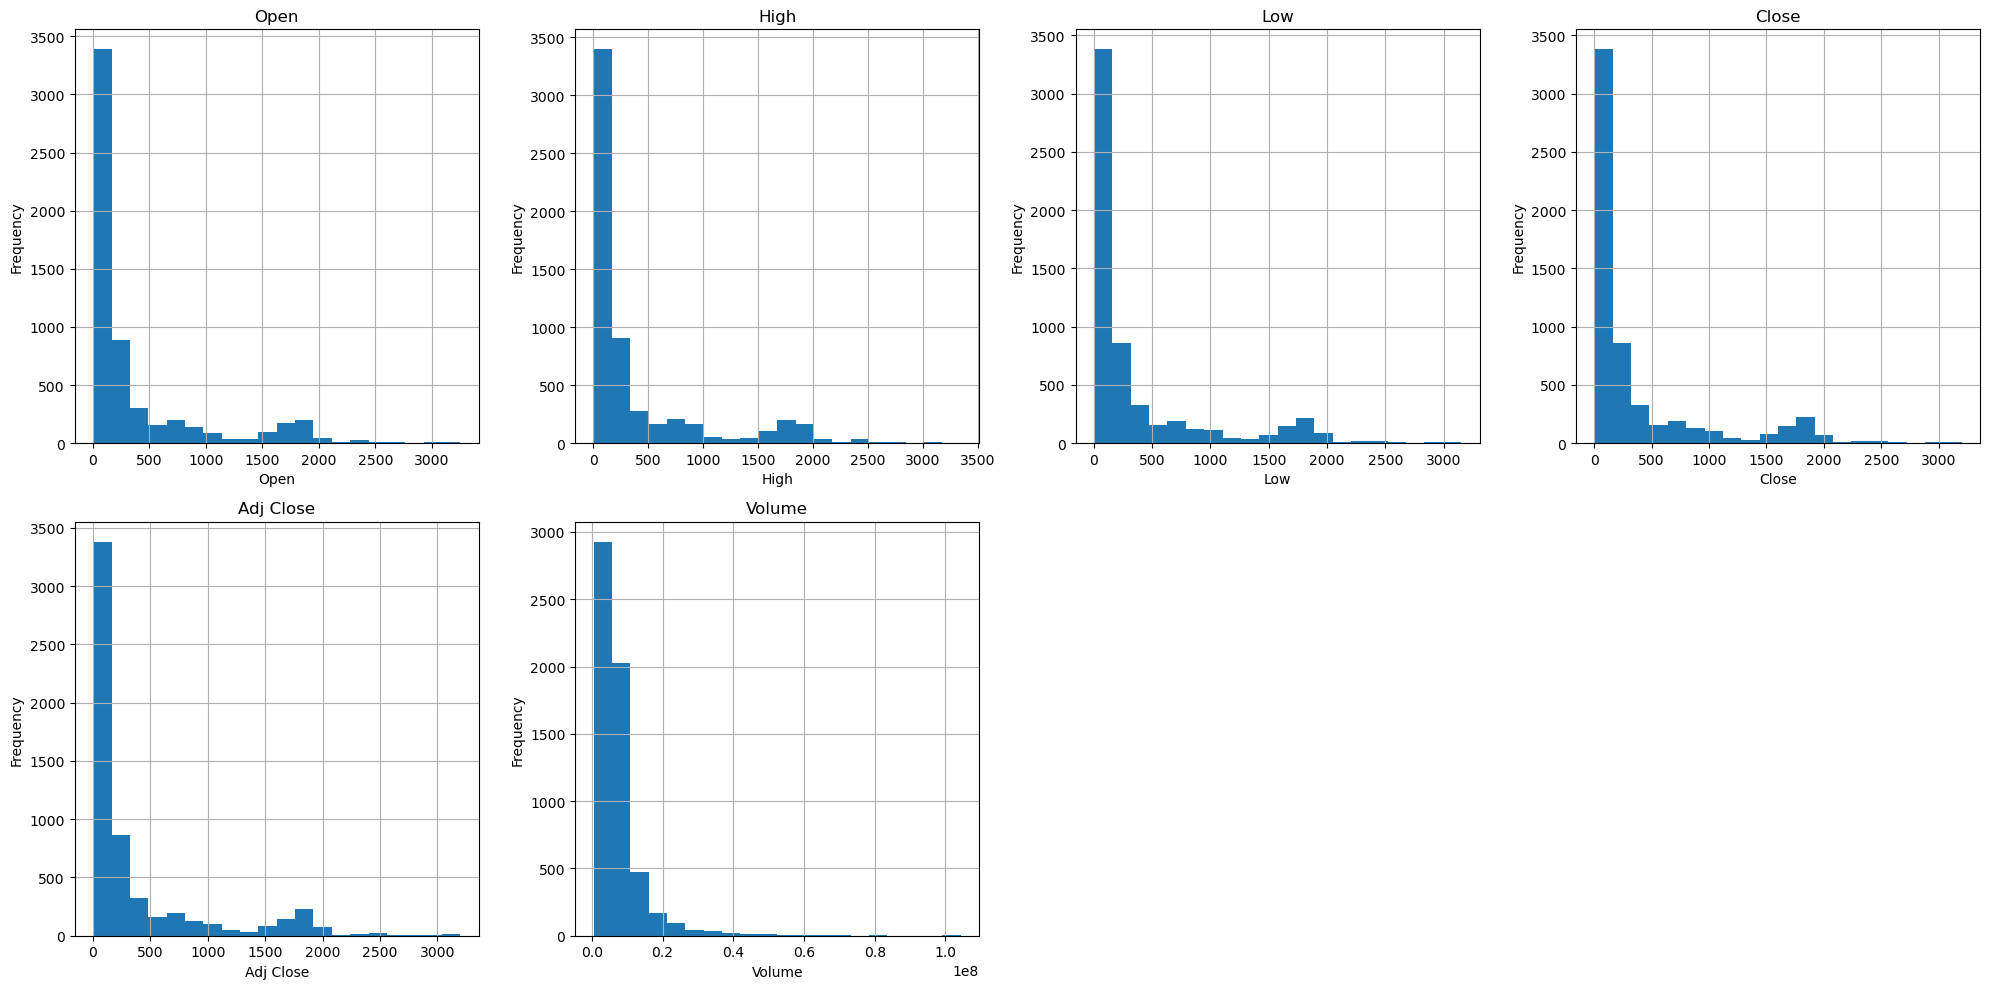

In [43]:
plot_histograms(df, num_cols)

### 4.3) Aykırı Değer Analizi (Outlier Analysis)

In [44]:
def boxplot(dataframe, numeric_columns):
    num_plots = len(numeric_columns)
    num_rows = (num_plots + 3) // 4  # Yukarıya yuvarlama işlemi
    fig, axes = plt.subplots(num_rows, 4, figsize=(18, 4*num_rows))
    
    for i, column in enumerate(numeric_columns):
        row = i // 4
        col = i % 4
        sns.boxplot(y=dataframe[column], ax=axes[row, col])
        axes[row, col].set_title(f'Boxplot of {column}')
        axes[row, col].set_ylabel(column)
    
    # Kullanılmayan subplotları boş bırak
    for j in range(num_plots, num_rows*4):
        row = j // 4
        col = j % 4
        fig.delaxes(axes[row, col])
    
    plt.tight_layout()
    plt.show()

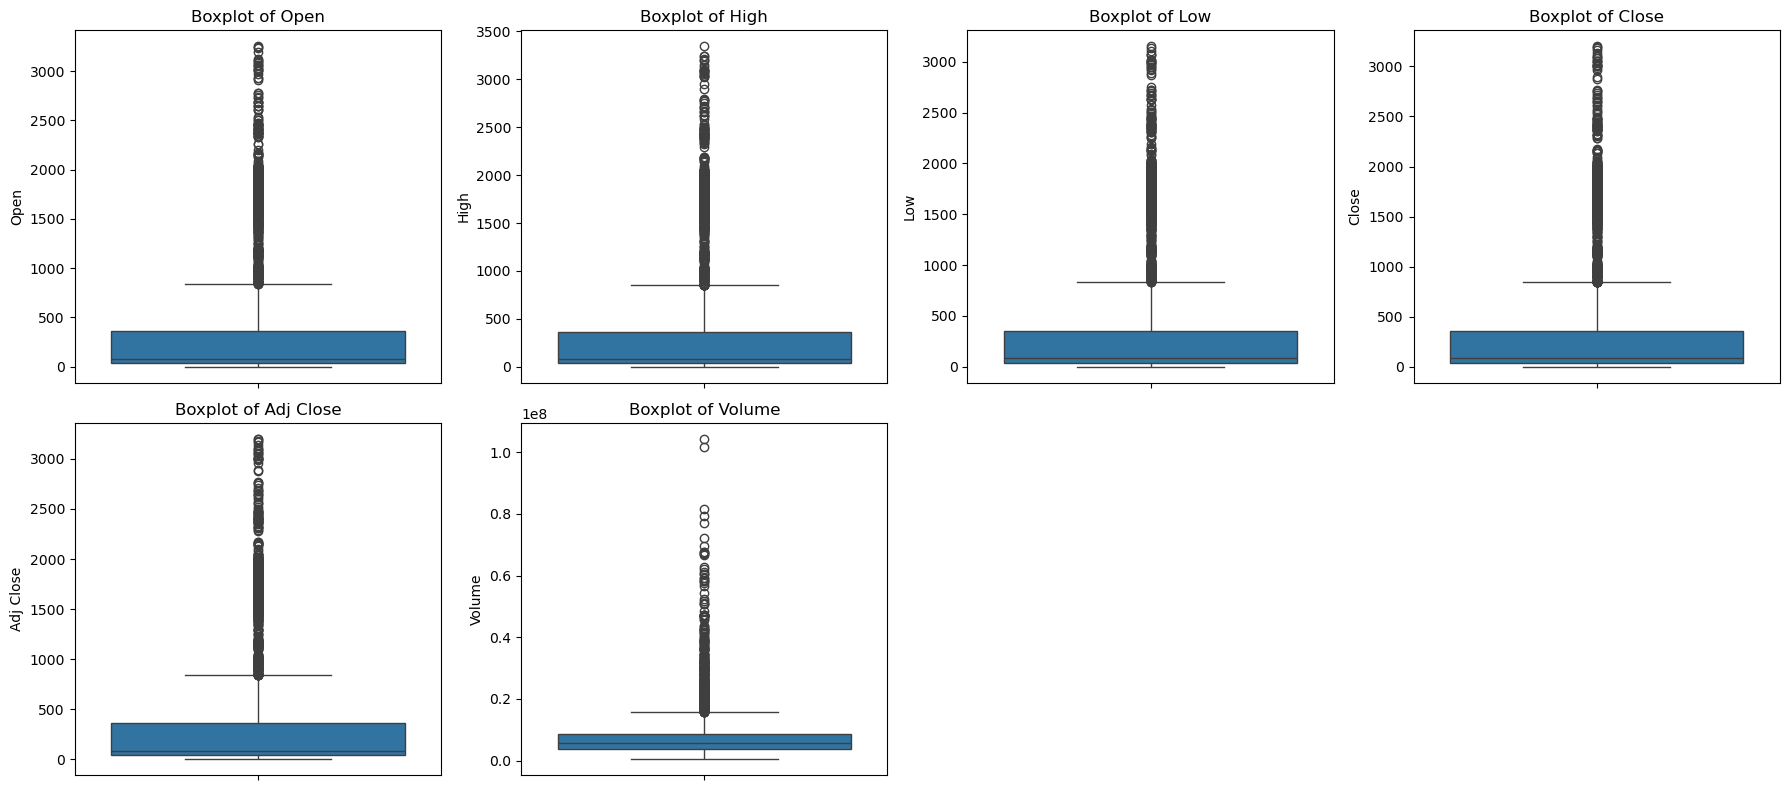

In [45]:
boxplot(df, num_cols)

<p style="font-size: 20px">Veri setimizdeki bütün değişkenlerde aykırı değerlerin varlığından söz edebiliriz. Ancak bu aykırı değerlere herhangi bir baskılama işlemi ya da silme işlemi uygulamayacağız çünkü bir zaman serisi problemi ile ilgileniyoruz. Burada aykırı değerleri silmek zaman serimizi bozacağından ve baskılama ise modelimizin zaman serisinin örüntüsünü öğrenmesini negatif etkileyeceğinden aykırı değerlere dokunmayacağız.</p>

### 4.4) Korelasyon Analizi (Correlation Analysis)

In [46]:
corr = df.corr()

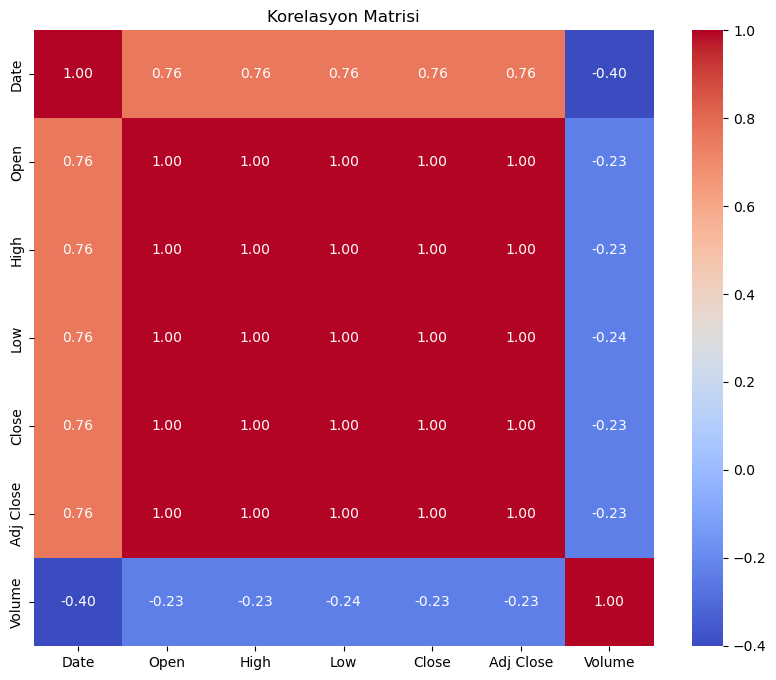

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()

<p style="font-size: 20px">Korelasyon analizinde "Open", "High", "Low", "Close" değişkenlerinin kendi aralarında birbirleriyle pozitif yönde yüksek korelasyon barındırdıklarını görüyoruz. Bu da "Open", "High", "Low", "Close" değişkenlerinin neredeyse aynı bilgileri taşıdıkları anlamına geliyor. Burada bu problemi çözmek için "Open", "High", "Low" değişkenlerini göz ardı edip sadece Close değişkeni ile ilgileneceğiz.</p>

### 4.5) Zaman Serisinin Yapısal Analizi (Structural Analysis of Time Series)

In [48]:
# Durağanlık Testi (Dickey-Fuller Testi) için Kullanılacak Fonksiyon

def is_stationary(y):
    # H0: Durağan değildir.
    # H1: Durağandır.
    
    p_value = sm.tsa.stattools.adfuller(y)[1]
    
    if p_value < 0.05:
        print(f"Sonuç: Durağandır. (H0: Durağan değildir, p-value: {round(p_value, 3)})")
    else:
        print(f"Sonuç: Durağan değildir. (H0: Durağan değildir, p-value: {round(p_value, 3)})")

In [49]:
is_stationary(df["Close"])

Sonuç: Durağan değildir. (H0: Durağan değildir, p-value: 1.0)


In [50]:
# Zaman Serisi Bileşenlerine Bakmak için Kullanılacak Fonksiyon

def ts_decompose(y, model="additive"):
    result = seasonal_decompose(y, model=model)
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    
    axes[0].set_title("Decomposition for " + model + " model")
    axes[0].plot(y, "k", label="Original " + model)
    axes[0].legend(loc="upper left")
    
    axes[1].plot(result.trend, label="Trend")
    axes[1].legend(loc="upper left")
    
    axes[2].plot(result.seasonal, "g", label="Seasonality & Mean " + str(round(result.seasonal.mean(), 4)))
    axes[2].legend(loc="upper left")
    
    axes[3].plot(result.resid, "r", label="Residuals & Mean " + str(round(result.resid.mean(), 4)))
    axes[3].legend(loc="upper left")
    plt.show()

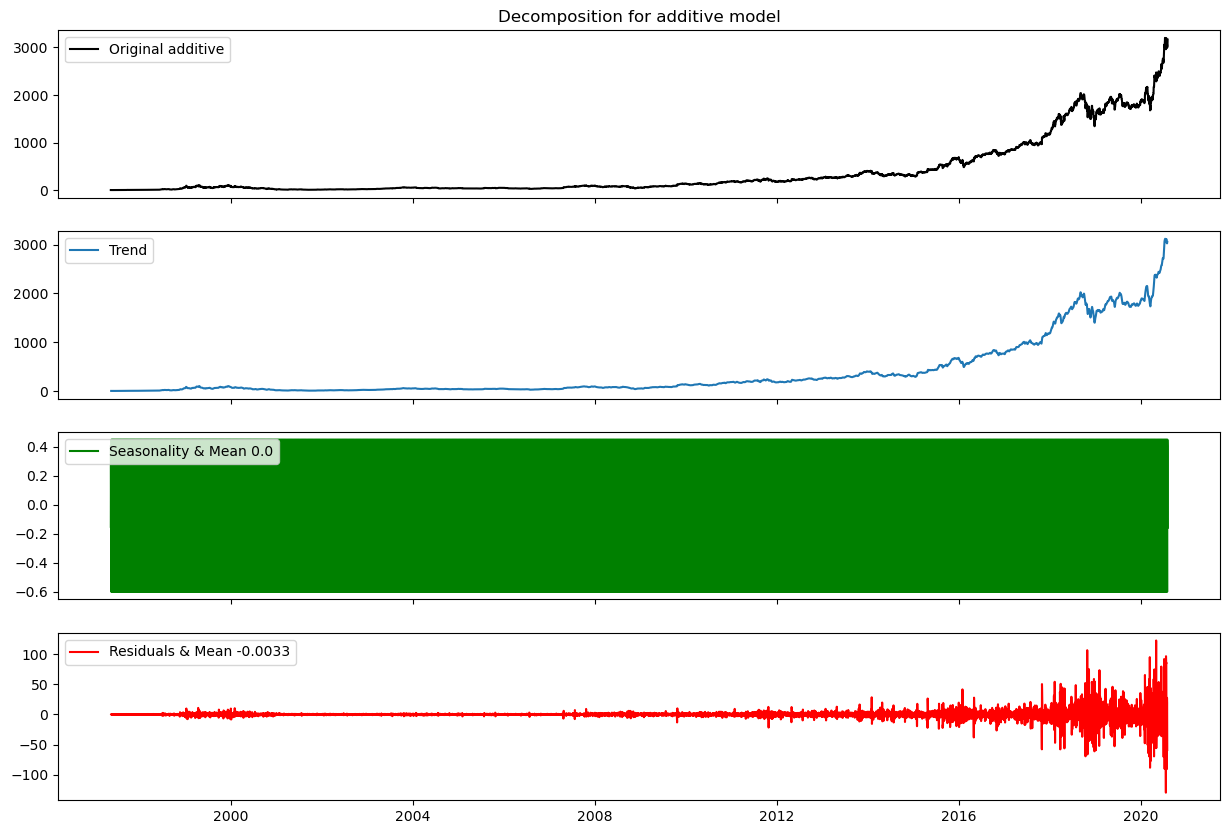

In [51]:
ts_decompose(df_stat["Close"])

<p>Bu grafik ile birlikte zaman serisini bileşenlerine ayırdık;
<ul>
    <li>Birinci grafik zaman serisinin orijinal grafiğidir.</li>
    <li>İkinci grafik zaman serisinin trend bileşeni grafiğidir.</li>
    <li>Üçüncü grafik zaman serisinin mevsimsellik bileşeni grafiğidir.</li>
    <li>Dördüncü grafik ise zaman serisinin artık bileşeni (gürültü) grafiğidir.</li>
</ul>
Yukarıdaki bilgilerden yola çıkarak bu zaman serisini yorumlayacak olursak, bu zaman serisi <b>durağan olmayan</b>, <b>yukarı yönlü trendi</b> olan ve <b>mevsimselliği olmayan</b> bir zaman serisidir.
</p>

## 5) Modelleme (Modeling)

In [52]:
# Tahminleri Görselleştirmek için Kullanılacak Fonksiyon

def plot_stock_price(train, test, y_pred, title):
    mae = mean_absolute_error(test, y_pred)
    train["Close"].plot(legend=True, label="TRAIN")
    test["Close"].plot(legend=True, label="TEST")
    y_pred.plot(legend=True, label="PREDICTION")
    plt.title(f"{title}, MAE: {round(mae, 5)}")
    plt.show()

### 5.1) Düzeltme Yöntemleri (Smoothing Methods)

<p>Bu problemde zaman serimizde mevsimsellik olmadığı için düzelteme yöntemleri arasından sadece Double Exponential Smoothing yöntemini kullanacağız. </p>

#### 5.1.1) Double Exponential Smoothing (DES)

<p>
    Kullanacak olduğumuz bu yöntem level'ın yanında trendi de modelleyebiliyor olacak.

<ul>
        <li>Trend etkisini göz önünde bulundurarak üstsel düzeltme yapar.</li>
        <li>DES = Level (SES) + Trend</li>
        <li>Temel yaklaşım aynıdır. Single Exponential Smoothing'e ek olarak trend de dikkate alınır.</li>
        <li>Trend içeren ve mevsimsellik içermeyen tek değişkenli zaman serileri için kullanımı uygundur.</li>
</ul>
</p>

In [53]:
des_model = ExponentialSmoothing(train_stat, trend="add").fit(smoothing_level=0.5, 
                                                         smoothing_trend=0.5)

In [54]:
y_pred = des_model.forecast(len(test_stat))

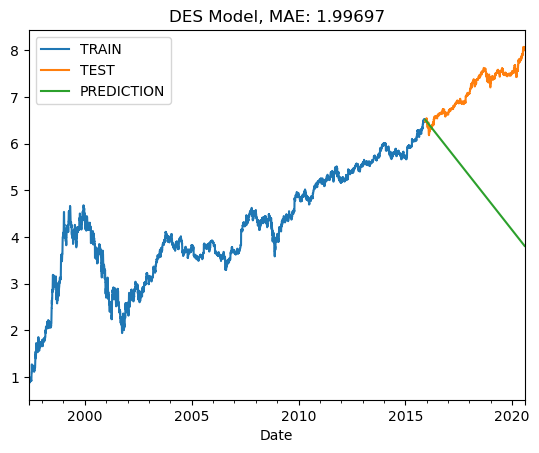

In [55]:
plot_stock_price(train_stat, test_stat, y_pred, "DES Model")

In [56]:
# Gerçek MAE değerine bakma
des_mae = mean_absolute_error(np.expm1(test_stat), np.expm1(y_pred))
des_mae

1167.9832092389297

#### DES Hiperparametre Optimizasyonu (DES Hyperparameter Optimization)

In [57]:
# Double Exponential Smoothing'i Optimize Etmek için Kullanılacak Fonksiyon

def des_optimizer(train, alphas, betas, step = len(test_stat)):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_trend=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test_stat, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            print(f"Alpha: {round(alpha,2)} Beta: {round(beta, 2)} MAE: {round(mae, 2)}")
            
    print(f"Best Alpha: {round(best_alpha, 2)} Best Beta: {round(best_beta, 2)} Best MAE: {round(best_mae, 4)}")
    return best_alpha, best_beta, best_mae

In [58]:
alphas = np.arange(0.1, 1, 0.01)
betas = np.arange(0.1, 1, 0.01)

In [59]:
# best_alpha, best_beta, best_mae = des_optimizer(train_stat, alphas, betas)

<p style="font-size: 20px"> Hiperparametre Optimizasyonu Sonrası Optimum Değerler: Best Alpha: 0.12 Best Beta: 0.82 Best MAE: 0.1085</p>

In [60]:
des_final = ExponentialSmoothing(train_stat, trend="add").fit(smoothing_level=0.12, smoothing_trend=0.82)

In [61]:
y_pred = des_final.forecast(len(test_stat))

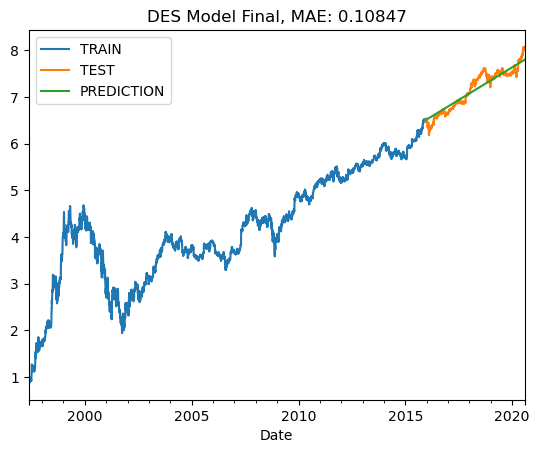

In [62]:
plot_stock_price(train_stat, test_stat, y_pred, "DES Model Final")

In [63]:
des_final_mae = mean_absolute_error(np.expm1(test_stat), np.expm1(y_pred))
des_final_mae

152.85687243404482

### 5.2) İstatistiksel Yöntemler (Statistical Methods)

<p>Bu problemde zaman serimizde mevsimsellik olmadığı için istatistiksel metodlar arasından sadece ARIMA yöntemini kullanacağız.</p>

#### 5.2.1) ARIMA (p, d, q)

<p>
Zaman serilerinde seri durağan olmadığında tahmin etme performasının düştüğü varsayımı vardır. Çünkü durağan bir seri oluşturacağı örüntüler kapsamında daha tahmin edilebilirdi fakat durağan olmayan trendi olan bir seri daha öngürelemezdir. Bundan dolayı elimizde bir seri varsa ve durağan değilse belirli istatistiksel yöntemler ile bu seri durağanlaştırılır ki tahmin edilebilirliği artsın. 
    
ARIMA yöntemi kullanacağımız metodlar içerisinde kendisi otomatik bir şekilde fark alma işlemi gerçekleştirir ve seriyi durağanlaştırır.
    <ul>
        <li>Önceki zaman adımlarındaki farkı alınmış gözlemlerin ve hataların doğrusal bir kombinasyonu ile tahmin yapılır.</li>
        <li>Tek değişkenli, trendi olan fakat mevsimselliği olmayan veriler için uygundur.</li>
        <li>p: gerçek deper gecikme sayısı (otoregresif derece) p = 2 ise yt-1 ve yt-2 modeldedir.</li>
        <li>d: fark işlemi sayısı</li>
        <li>q: hata gecikme sayısı (hareket ortalama derecesi)</li>
    </ul>
</p>

In [64]:
import itertools

In [65]:
# Rastgele p, d, q değerleri ile modeli fit etme işlemi
arima_model = ARIMA(train_stat, order=(1, 1, 1)).fit()

In [66]:
# Tahmin işlemi
y_pred = arima_model.forecast(len(test_stat))[0]
y_pred = pd.Series(y_pred, index=test_stat.index)

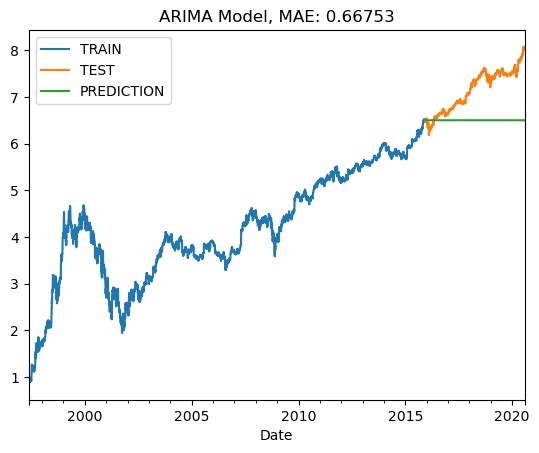

In [67]:
plot_stock_price(train_stat, test_stat, y_pred, "ARIMA Model")

#### ARIMA Hiperparametre Optimizasyonu (ARIMA Hyperparameter Optimization)

In [68]:
# ARIMA Modelini Optimize Etmek için Kullanılacak Fonksiyon

def arima_optimizer_mae(train, orders):
    best_mae, best_params = float("inf"), None
    
    for order in orders:
        try:
            # Modeli eğit ve tahmin yap
            arima_model_result = ARIMA(train, order=order).fit()
            predictions = arima_model_result.forecast(steps=len(test_stat))
            
            # MAE'yi hesapla
            mae = mean_absolute_error(test_stat, predictions)
            if mae < best_mae:
                best_mae, best_params = mae, order
            print("ARIMA%s MAE=%.4f" % (order, mae))
        except Exception as e:
            print(f"Order {order} failed with error: {e}")
            continue
    
    if best_params is not None:
        print("Best ARIMA%s MAE=%.4f" % (best_params, best_mae))
    else:
        print("No valid ARIMA model found.")
    
    return best_params

In [69]:
p = d = q = range(0, 4)

pdq = list(itertools.product(p, d, q))

In [70]:
# best_params_mae = arima_optimizer_mae(train_stat, pdq)

<p style="font-size: 20px">Hiperparametre Optimizasyonu Sonrası Optimum Değerler: Best ARIMA(1, 2, 3) MAE=0.2043</p>

In [71]:
# Final Model
arima_final = ARIMA(train_stat, order=(1, 2, 0)).fit()
y_pred = arima_final.forecast(len(test_stat))[0]
y_pred = pd.Series(y_pred, index = test_stat.index)

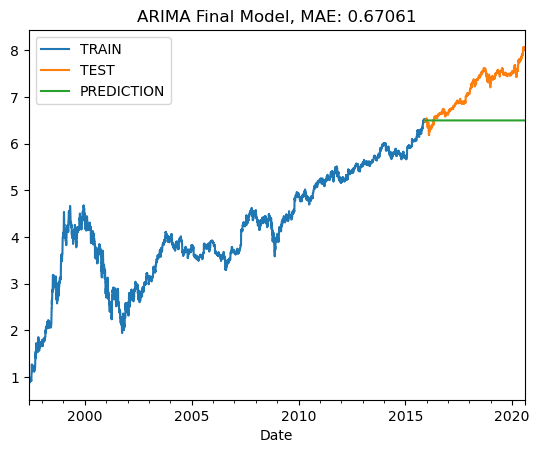

In [72]:
plot_stock_price(train_stat, test_stat, y_pred, "ARIMA Final Model")

In [73]:
# Gerçek MAE Değeri
arima_final_mae = mean_absolute_error(np.expm1(test_stat), np.expm1(y_pred))
arima_final_mae

744.4742765597508

### 5.3) Derin Öğrenme Yöntemleri

#### 5.3.1) LSTM

In [74]:
# Sıralı bir model kuruyoruz
model = Sequential()

In [75]:
# Bu modele katmanlar ekliyoruz
model.add(LSTM(units=50, activation="relu", input_shape=(X_train.shape[1], lookback)))
model.add(Dropout(rate=0.10))
model.add(Dense(1))

In [76]:
# Model özetine bakma
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          11,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,651 (45.51 KB)

 Trainable params: 11,651 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Optimizasyon ve değerlendirme metrikleri
model.compile(loss="mean_absolute_error", 
              optimizer="adam")

In [78]:
# Callbackler
callbacks = [ReduceLROnPlateau(monitor="val_loss", 
                               patience=2, 
                               verbose=1, 
                               mode="min"), 
             EarlyStopping(monitor="val_loss", 
                           patience=9, 
                           verbose=1, 
                           mode="min", 
                           restore_best_weights=True)]

In [79]:
history = model.fit(x=X_train, 
                    y=y_train, 
                    epochs=30, 
                    batch_size=7, 
                    validation_data=(X_test, y_test), 
                    callbacks=callbacks, shuffle=False)

Epoch 1/100
968/968 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4973 - val_loss: 0.1132 - learning_rate: 0.0010
Epoch 2/100
968/968 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2802 - val_loss: 0.1523 - learning_rate: 0.0010
Epoch 3/100
968/968 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2390 - val_loss: 0.1116 - learning_rate: 0.0010
Epoch 4/100
968/968 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2299 - val_loss: 0.0919 - learning_rate: 0.0010
Epoch 5/100
968/968 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2339 - val_loss: 0.1813 - learning_rate: 0.0010
Epoch 6/100
968/968 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2432 - val_loss: 0.0704 - learning_rate: 0.0010
Epoch 7/100
968/968 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2516 - val_loss: 0.0445 - learning_rate: 0.0010
Epoch 8/100
968/968 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2463 - val_loss: 0.0486 - learning_rate: 0.0010
Epoch 9/100
954/968 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2549
Epoch 9: ReduceLROnPlateau reducing learning

Text(0.5, 1.0, 'Training and Test Loss Graph')

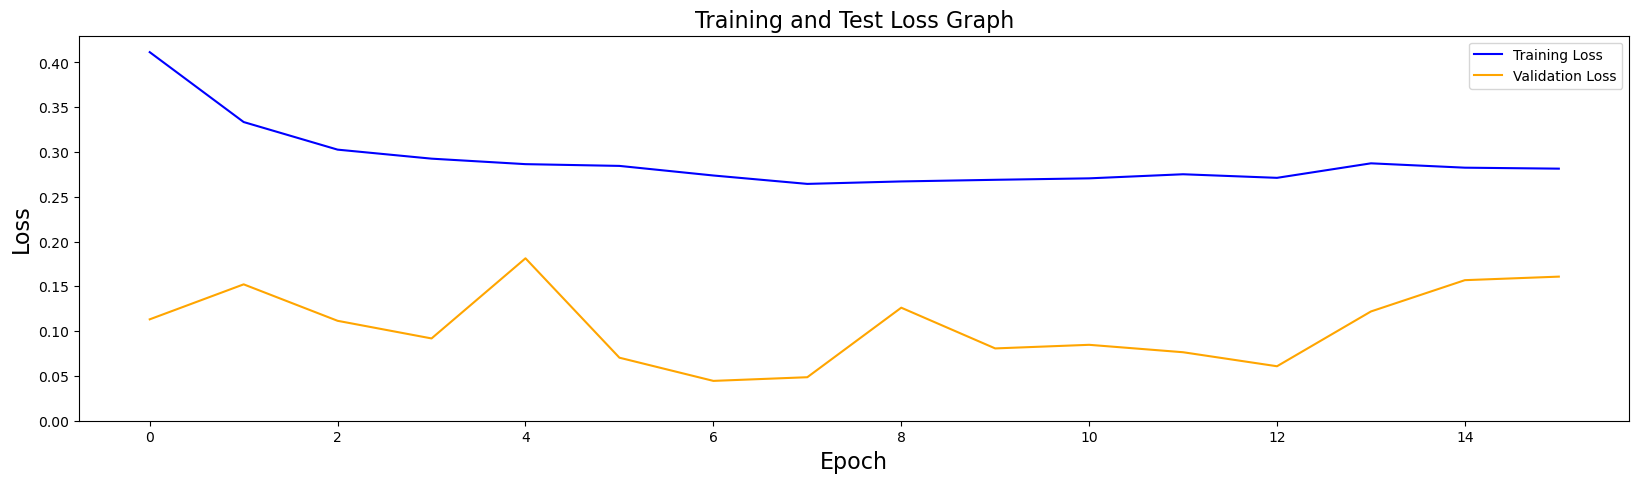

In [80]:
# Loss
plt.figure(figsize=(20, 5))
plt.plot(history.history["loss"], color="b", label="Training Loss")
plt.plot(history.history["val_loss"], color="orange", label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title("Training and Test Loss Graph", fontsize=16)

In [81]:
# Model Değerlendirme
loss = model.evaluate(X_test, y_test, batch_size=20)

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0304


In [82]:
print(f"Test Loss: {round(loss * 100.0, 2)}")

Test Loss: 4.45


In [83]:
# Bağımlı değerler ile tahmin işlemi (X_train, X_test)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [84]:
# Tahmin edilen değerleri orijinal haline çevirme

train_predict = np.expm1(train_predict)
test_predict = np.expm1(test_predict)

In [85]:
# Gerçek değerleri orijinal haline çevirme

y_train = np.expm1(y_train)
y_test = np.expm1(y_test)

In [86]:
# Train veri seti için MAE değeri hesaplama
lstm_train_mae = mean_absolute_error(y_train, train_predict)
lstm_train_mae

10.633143

In [87]:
# Test veri seti için MAE değeri hesaplama

lstm_test_mae = mean_absolute_error(y_test, test_predict)
lstm_test_mae

71.00706

In [88]:
result_df = df[["Date", "Close"]]
result_df.set_index("Date", drop=True, inplace=True)
result_df = result_df.asfreq("D")
result_df = result_df.fillna(method="bfill")

In [89]:
train_prediction_df = result_df[lookback:position]
train_prediction_df["Predicted"] = train_predict
train_prediction_df.head()

,Close,Predicted
Date,,
1997-05-22,1.395833,4.056545
1997-05-23,1.500000,3.955703
1997-05-24,1.583333,3.906476
1997-05-25,1.583333,3.895051
1997-05-26,1.583333,3.889265


In [90]:
test_prediction_df = result_df[lookback+position:]
test_prediction_df["Predicted"] = test_predict
test_prediction_df.head()

,Close,Predicted
Date,,
2015-12-17,670.650024,658.522217
2015-12-18,664.140015,657.746521
2015-12-19,664.510010,662.365662
2015-12-20,664.510010,662.120911
2015-12-21,664.510010,662.293884


## 6) Değerlendirme (Evaluation)

In [91]:
mae_values = [des_final_mae, arima_final_mae, lstm_test_mae]
model_names = ["DES", "ARIMA", "LSTM"]

evaluation = pd.DataFrame({"model_name": model_names, "mae": mae_values})

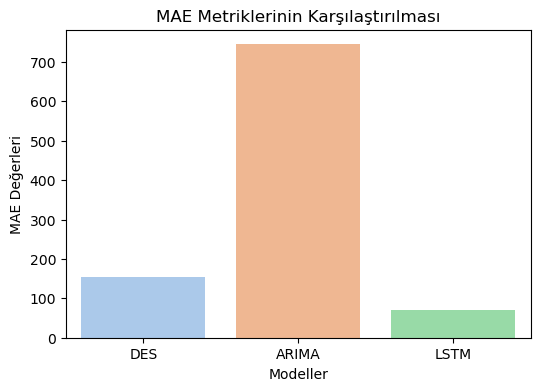

In [92]:
plt.figure(figsize=(6, 4))
sns.barplot(x="model_name", y="mae", data=evaluation, palette=sns.color_palette("pastel"))
plt.title("MAE Metriklerinin Karşılaştırılması")
plt.xlabel("Modeller")
plt.ylabel("MAE Değerleri")
plt.show()

<p>Yukarıdaki modellerden en düşük MAE değerine sahip olan model LSTM modeli olduğu için performansı en yüksek olan model LSTM'dir. Bundan sonraki işlemlere LSTM modeli ile devam edilecektir.</p>

## 7) Model Belirleme İşlemi Sonrası Tüm Veri Seti ile Yeni Bir Model Eğitme

### 7.1) Veriyi Hazırlama

In [93]:
df_dl[:3]

array([[1.9583334],
       [1.7291666],
       [1.7083334]], dtype=float32)

In [94]:
len(df_dl)

8479

In [95]:
train = df_dl[:8479]

In [96]:
lookback = 7

In [97]:
X_train, y_train = create_features(train, lookback)

In [98]:
X_train.shape, y_train.shape

((8472, 7), (8472,))

In [99]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

y_train = y_train.reshape(-1, 1)

In [100]:
X_train.shape, y_train.shape

((8472, 1, 7), (8472, 1))

### 7.2) Yeni Model Kurma ve Ağırlık Değiştirme

In [101]:
# Eğitmiş olduğumuz LSTM Modelimizin Ağırlıklarını Alma
lstm_model_weights = model.get_weights()

In [102]:
new_model = Sequential()

In [103]:
new_model.add(LSTM(units=50, activation="relu", input_shape=(X_train.shape[1], lookback)))
new_model.add(Dropout(rate=0.10))
new_model.add(Dense(1))

In [104]:
new_model.compile(loss="mean_absolute_error", optimizer="adam")

In [105]:
new_model.set_weights(lstm_model_weights)

In [106]:
# Callbackler
callbacks = [ReduceLROnPlateau(monitor="val_loss", 
                               patience=2, 
                               verbose=1, 
                               mode="min"), 
             EarlyStopping(monitor="val_loss", 
                           patience=5, 
                           verbose=1, 
                           mode="min", 
                           restore_best_weights=True)]

In [107]:
history = new_model.fit(x=X_train, 
                        y=y_train, 
                        epochs=100, 
                        batch_size=7, 
                        validation_split=0.2, 
                        callbacks=callbacks, 
                        shuffle=False)

Epoch 1/100
969/969 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.2681 - val_loss: 26.5380 - learning_rate: 0.0010
Epoch 2/100
969/969 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.3038 - val_loss: 47.3933 - learning_rate: 0.0010
Epoch 3/100
957/969 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6595
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
969/969 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.7597 - val_loss: 48.6315 - learning_rate: 0.0010
Epoch 4/100
969/969 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.7245 - val_loss: 84.9595 - learning_rate: 1.0000e-04
Epoch 5/100
951/969 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3565
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
969/969 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.4926 - val_loss: 73.4818 - learning_rate: 1.0000e-04
Epoch 6/100
969/969 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.2496 - val_loss: 42.0094 - learning_rate: 1.0000e-05
Epoch 6: early stopping
Restoring model weights fr

Text(0.5, 1.0, 'Training and Test Loss Graph')

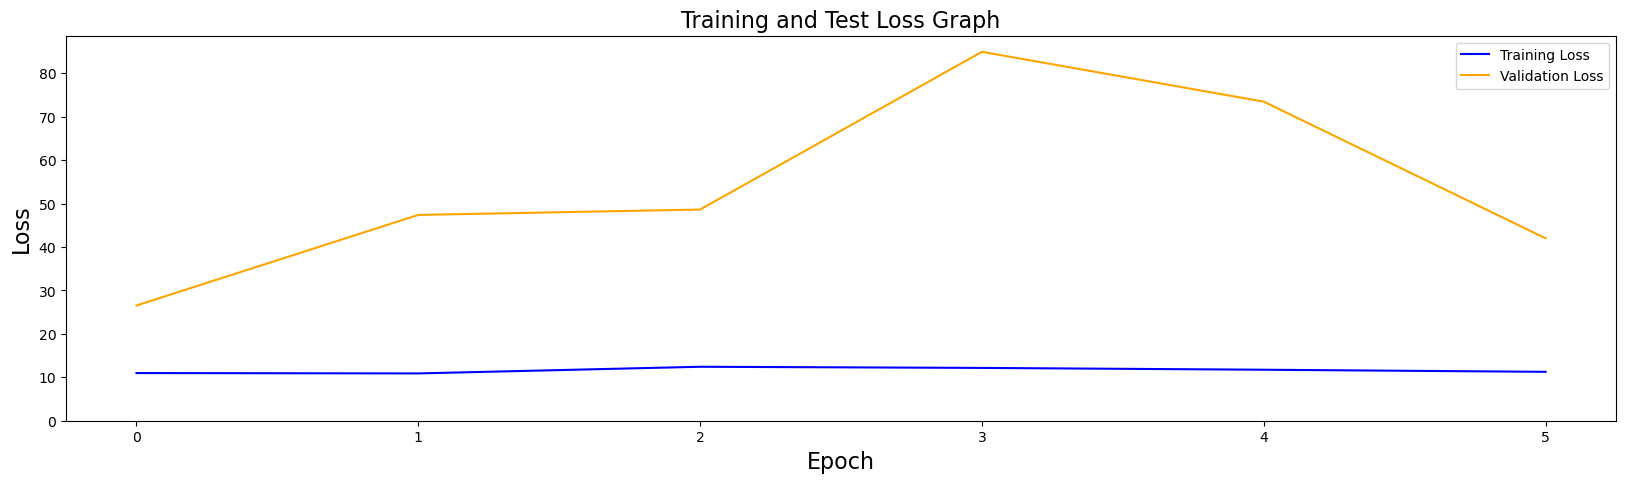

In [108]:
# Loss
plt.figure(figsize=(20, 5))
plt.plot(history.history["loss"], color="b", label="Training Loss")
plt.plot(history.history["val_loss"], color="orange", label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title("Training and Test Loss Graph", fontsize=16)

In [109]:
# new_model.save("LSTM_Best_Model.keras")